# Semantics and Sentiment Analysis

## Semantics and word vectors

In order to explore semantics and word vectors in spaCy, the small language model we have been using will no longer be sufficient. We need to download and install one of the larger spaCy language models. The small language model has no vectors, but it is very compact and efficient. The medium model has about twenty thousand vectors, and is about ten times the size of the small model. It is a balance between size and power. The large language model has about 685 thousand vectors, but is half again as large as the medium model. It is best for accuracy but is nearly a gigabyte in size and is resource intensive. In addition, there is a specialized vectors-only model that can be used when similarity comparisons are the only operation being carried out.

At this point, if using the Anaconda Navigator environment, navigate to the environments pane, and with your nlp environment selected, search for and install either the `en_core_web_md` model or the `en_core_web_lg` model. 

If you are using command line, the command is `python -m spacy download` and the name of the model. The command may be `python3` depending on your particular system install. It is also possible to install directly from a notebook cell by doing `conda run -n name_of_environment python -m spacy download en_core_web_sm`. However, the recommended approach is not to mix Anaconda and pure Python commands when installing libraries, so it is better to choose either the graphical Navigator installation or the command line Python installations.

In spaCy, each word is represented by a **vector** with 300 dimensions. These vectors encode the similarity between words, based on an analyis of a word contexts in a very large corpus of text using an algorithm called [word2vec](https://en.wikipedia.org/wiki/Word2vec). The vectors can then be used to plot a word's location in the 300-dimensional space, and calculate the distance between words using *cosine distance* to find the *cosine similarity*. 

With the spaCy library installed to our environment, and the medium or large English model downloaded, we can import the library and load the model.

In [1]:
import spacy
nlp = spacy.load('en_core_web_lg') # or _md

With the medium or large model loaded, when we tokenize a word, it has a `vector` property. When we inspect the vector, we see it is a list of 300 numbers. These numbers are a numerical representation of the word's semantic context in the English language, based on processing of large text corpora using the word2vec algorithm.

In [2]:
nlp('dog').vector

array([-4.0176e-01,  3.7057e-01,  2.1281e-02, -3.4125e-01,  4.9538e-02,
        2.9440e-01, -1.7376e-01, -2.7982e-01,  6.7622e-02,  2.1693e+00,
       -6.2691e-01,  2.9106e-01, -6.7270e-01,  2.3319e-01, -3.4264e-01,
        1.8311e-01,  5.0226e-01,  1.0689e+00,  1.4698e-01, -4.5230e-01,
       -4.1827e-01, -1.5967e-01,  2.6748e-01, -4.8867e-01,  3.6462e-01,
       -4.3403e-02, -2.4474e-01, -4.1752e-01,  8.9088e-02, -2.5552e-01,
       -5.5695e-01,  1.2243e-01, -8.3526e-02,  5.5095e-01,  3.6410e-01,
        1.5361e-01,  5.5738e-01, -9.0702e-01, -4.9098e-02,  3.8580e-01,
        3.8000e-01,  1.4425e-01, -2.7221e-01, -3.7016e-01, -1.2904e-01,
       -1.5085e-01, -3.8076e-01,  4.9583e-02,  1.2755e-01, -8.2788e-02,
        1.4339e-01,  3.2537e-01,  2.7226e-01,  4.3632e-01, -3.1769e-01,
        7.9405e-01,  2.6529e-01,  1.0135e-01, -3.3279e-01,  4.3117e-01,
        1.6687e-01,  1.0729e-01,  8.9418e-02,  2.8635e-01,  4.0117e-01,
       -3.9222e-01,  4.5217e-01,  1.3521e-01, -2.8878e-01, -2.28

It is not only individual tokens that have vectors. Spans (which are slices of spaCy document objects, consisting of sequences of tokens) can also be vectorized. A span vector is roughly equivalent to an average of its vectors. Likewise, an entire spaCy document object, which is also a list of tokens, can also be vectorized Let's take Robert Frost's poem, "The Road Not Taken":

In [3]:
road = """Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference."""

If we tokenize it (convert it to a spaCy `doc` object) we can see that the `doc` object has a vector, calculated by default as the average of the values for all the tokens.

In [4]:
doc = nlp(road)
doc.vector

array([ 3.58007923e-02,  1.42331287e-01, -1.70300081e-01, -1.03861965e-01,
        7.87652433e-02,  1.77814346e-02, -7.40638003e-04, -9.27357972e-02,
       -6.49082139e-02,  2.08244872e+00, -1.10600047e-01,  4.95612063e-02,
        4.78214510e-02, -4.59042490e-02, -1.35927260e-01, -5.81276976e-02,
       -3.39424536e-02,  9.18814838e-01, -1.50312185e-01, -2.54956894e-02,
       -1.93598084e-02, -2.62141433e-02, -2.76568159e-02, -5.01870224e-03,
       -7.93671608e-03, -2.64599151e-03, -7.89960474e-02, -8.26885328e-02,
        5.43260314e-02, -6.78705201e-02, -5.89197055e-02,  1.05763167e-01,
       -6.19107448e-02,  2.43006125e-02,  5.20185344e-02, -7.56477192e-02,
        2.07314957e-02, -1.56511064e-03, -7.95825273e-02, -6.19825460e-02,
        4.08514962e-03,  7.77726322e-02,  7.14108627e-03, -4.44584787e-02,
        4.58712094e-02,  3.09726149e-02, -1.71136722e-01, -7.84232393e-02,
        4.05292921e-02, -7.34762195e-03, -4.39653471e-02,  4.09191698e-02,
       -6.15574419e-02,  

We can see from the text that there are two consecutive newlines between stanzas, so we can get a list of stanzas by splitting the text on double newlines, then 

In [5]:
stanzas = road.split('\n\n')
stanzas[0]

'Two roads diverged in a yellow wood,\nAnd sorry I could not travel both\nAnd be one traveler, long I stood\nAnd looked down one as far as I could\nTo where it bent in the undergrowth;'

In [6]:
from textblob import TextBlob
from spacy.tokens import Doc

if not Doc.has_extension("polarity"):
    Doc.set_extension("polarity", getter=lambda para: TextBlob(para.text).sentiment.polarity)

if not Doc.has_extension("subjectivity"):
    Doc.set_extension("subjectivity", getter=lambda para: TextBlob(para.text).sentiment.subjectivity)

Now, we can convert the doc into spaCy Span objects. A Span object is a slice of a Doc object. A Doc object is a list of tokens. For any given paragraph, we need to find the paragraph's start index by finding the index of the first token in that paragraph. The following method was developed with assistance from ChatGPT and Claude 3.5 Haiku. 

In [7]:
def get_paragraph_spans(paragraphs, doc):
    paragraph_spans = []
    current_start = 0

    for paragraph in paragraphs:
        # Skip empty paragraphs
        if not paragraph.strip():
            continue
        
        # Find the start and end tokens for this paragraph
        start_token = doc.text.index(paragraph.strip(), current_start)
        start_index = doc.text.count('\n', 0, start_token) // 2
        
        paragraph_tokens = [token for token in doc if token.idx >= start_token and 
                             token.idx < (start_token + len(paragraph))]
        
        if paragraph_tokens:
            # Create a Span from the first to the last token of the paragraph
            span = doc[paragraph_tokens[0].i : paragraph_tokens[-1].i + 1]
            paragraph_spans.append(span)
        
        # Update the current start position
        current_start = start_token + len(paragraph)

    return paragraph_spans

In [8]:
road_stanza_spans = get_paragraph_spans(stanzas, doc)

In [9]:
print(road_stanza_spans[0].text)

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;


We can now look at the vector for a stanza of Frost's poem. This is a Span vector.

In [10]:
road_stanza_spans[0].vector

array([ 6.48187846e-02,  1.15856700e-01, -1.87847987e-01, -1.20075941e-01,
        1.58424169e-01,  3.31299789e-02, -3.03403065e-02, -9.06934813e-02,
       -1.28461733e-01,  2.05087876e+00, -1.21097565e-01,  2.89238989e-02,
        3.53118517e-02, -5.97297922e-02, -1.12062454e-01, -3.08203381e-02,
        7.24623771e-03,  9.69007075e-01, -1.13324948e-01, -5.97043484e-02,
       -2.48616356e-02,  1.63143203e-02, -3.61993648e-02, -2.12676581e-02,
        2.65437271e-03, -1.24124698e-02, -9.27573666e-02, -5.90840466e-02,
        1.04901724e-01, -2.77050007e-02, -7.25389794e-02,  1.10153198e-01,
       -6.64569512e-02,  1.73115470e-02,  5.19905686e-02, -1.32735714e-01,
        4.29141261e-02, -9.28337034e-03, -1.53279439e-01, -1.00588374e-01,
        3.84758674e-02,  8.20854828e-02,  2.43002493e-02, -4.21542227e-02,
        6.38493076e-02,  1.42825721e-02, -1.52500615e-01, -1.50272354e-01,
        3.60843875e-02, -8.54081102e-03, -4.64599878e-02,  1.02299685e-02,
       -8.97775143e-02,  

We've seen three kinds of vectors: token vectors, span vectors, and doc vectors. 

Vectorized objects have a built-in `similarity` method we can use to compare their similarities. This is a mathematical computation of their semantic relatedness. Here we can see that "road" and "path" have over 50% semantic relatedness, but "umbrella" is not closely related to these words.

In [11]:
tokens = nlp('weird strange morphology')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

weird weird 1.0
weird strange 0.8671860694885254
weird morphology 0.08709226548671722
strange weird 0.8671860694885254
strange strange 1.0
strange morphology 0.1192564144730568
morphology weird 0.08709226548671722
morphology strange 0.1192564144730568
morphology morphology 1.0


Here, we see that the words "weird" and "strange" have very high similarity (above 80%). However, the word "morphology" is not closely related to those words and has a very low similarity to them. 

We can also compare entire sentences to evaluate semantic relatedness. Here we have two sentences that are nearly identical, or synonymous (similarity above 95%). 

In [12]:
sen1 = nlp("May I help you")
sen2 = nlp("What may I do for you")
sen1.similarity(sen2)

0.9534388872548968

Let's experiment with these properties of spaCy tokens in the context of literary analysis. First, Let's load up the text of *Jane Eyre* and then extract a sample chapter.

In [13]:
with open('jane-eyre.txt') as je:
    full_text = je.read()

print(len(full_text))

1041691


Here is a method for extracting any given chapter from this specific text of *Jane Eyre*. Created with assistance from ChatGPT.

In [14]:
import re

def extract_chapter(full_text, chapter_number):
    # Define regex pattern to find chapter headings
    pattern = rf"\n+CHAPTER {chapter_number}\n+"
    
    # Split text at chapter headings
    chapters = re.split(pattern, full_text, flags=re.IGNORECASE)

    if len(chapters) > 1:
        return chapters[1].strip().split("\nCHAPTER")[0]  # Extract up to the next chapter
    else:
        return "Chapter not found."

Now we can extract a specific chapter:

In [15]:
chapter_24 = extract_chapter(full_text, "XXIV")

Now, we can tokenize the text.

In [16]:
ch_24_doc = nlp(chapter_24)

We could also vectorize, for example, paragraphs. To extract paragraphs, we need to figure out how paragraphs are marked in this particular text file. When we look at it, we can see that paragraphs are separated by double newline characters.

Let's convert the paragraphs into spaCy Span objects using the function we created earlier.

In [17]:
paragraphs = chapter_24.split("\n\n")
paragraph_spans = get_paragraph_spans(paragraphs, ch_24_doc)

Let's say we want to study the way Brontë describes Rochester in *Jane Eyre*. We can filter the paragraphs to extract only those referring explicitly to Rochester:

In [18]:
rochester_paras = [span for span in paragraph_spans if "Rochester" in span.text]

We can see that there are 24 paragraphs in chapter 24 that refer to Rochester.

In [19]:
len(rochester_paras)

24

Now, we can do similarity comparisons. Interestingly, word2vec vector representations of these paragraphs show high similarities.

In [20]:
rochester_paras[0].similarity(rochester_paras[1])

0.8799834847450256

Let's do a visualization. Here is some code developed with the assistance of ChatGPT to display a heatmap representation of similarity levels between the paragraphs in chapter 24 of *Jane Eyre* that reference Rochester.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# Convert paragraphs into vector representations
vectors = np.array([span.vector for span in rochester_paras])

# Check if all vectors are nonzero (some models may not have good vectors)
if not np.any(vectors):
    raise ValueError("Vectors are empty. Try using 'en_core_web_md' or 'en_core_web_trf'.")

In [22]:
# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(vectors)

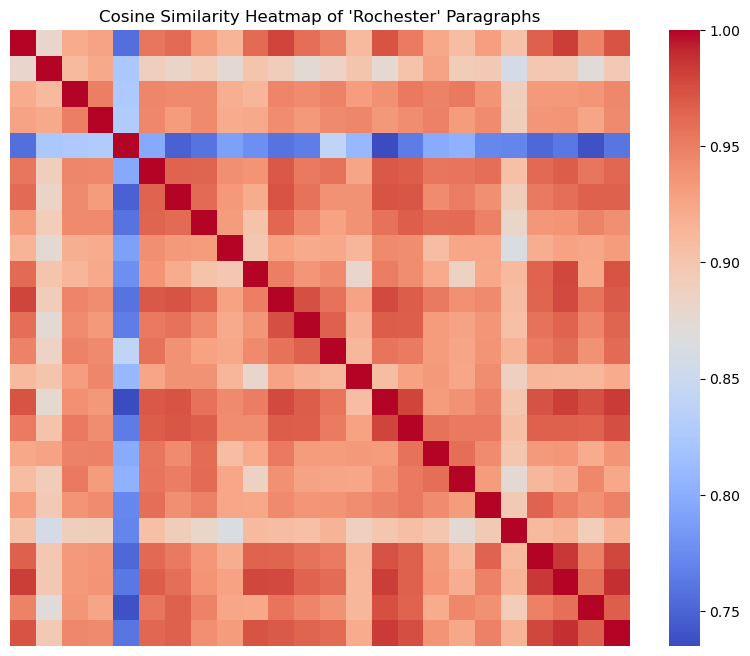

In [23]:
# Create a heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap of 'Rochester' Paragraphs")
plt.show()

I requested the axes be labeled so we can see the specific paragraphs that are most closely or most distantly related in semantic terms.

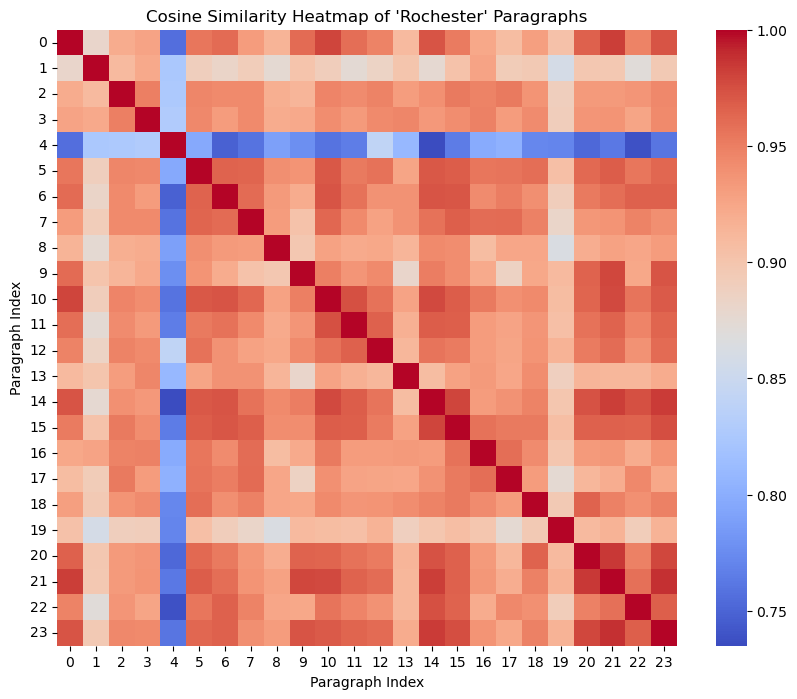

In [24]:
# Create a list of indices for labels (0-20)
indices = list(range(len(rochester_paras)))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix, 
    annot=False, 
    cmap="coolwarm", 
    xticklabels=indices,  # Label columns by index
    yticklabels=indices   # Label rows by index
)

# Improve readability
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.title("Cosine Similarity Heatmap of 'Rochester' Paragraphs")
plt.xlabel("Paragraph Index")
plt.ylabel("Paragraph Index")
plt.show()

Another approach to visualizing vector relatedness is to use cluster charts. This visualization was developed with assistance from ChatGPT. It uses **t-SNE**, which is t-distributed Stochastic Neigbhor Embedding. The "t" stands for Student's t-distribution. The benefit of t-SNE is it reduces the 300-dimensional math of spaCy vector relations to two dimensions for visualization. This code then uses the `matplotlib` visualization library to generate a chart.

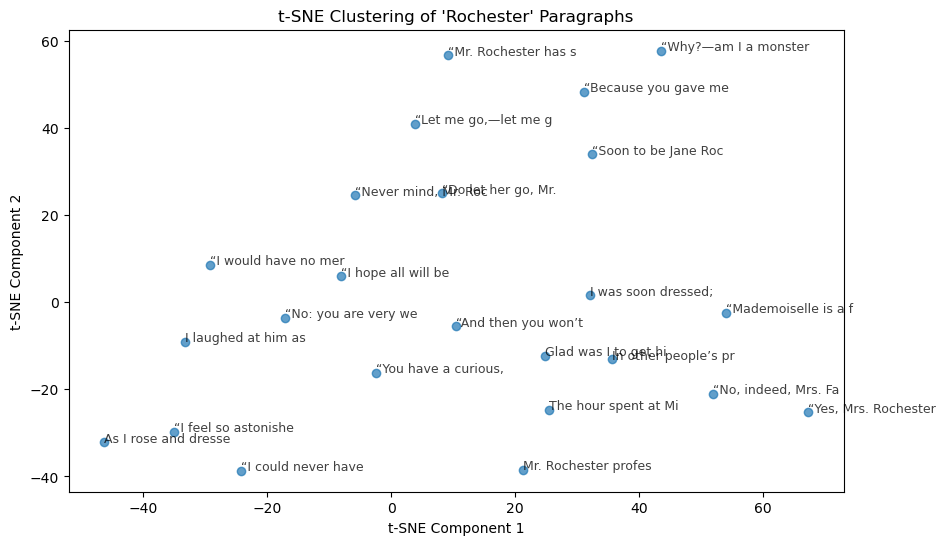

In [25]:
# Reduce vector dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity = 5, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with the first few words of the paragraph
for i, span in enumerate(rochester_paras):
    plt.annotate(span.text[:20], (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9, alpha=0.75)

plt.title("t-SNE Clustering of 'Rochester' Paragraphs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

I requested that the points be labeled with a bit more text and the index of the chapter within the Rochester paragraphs list.

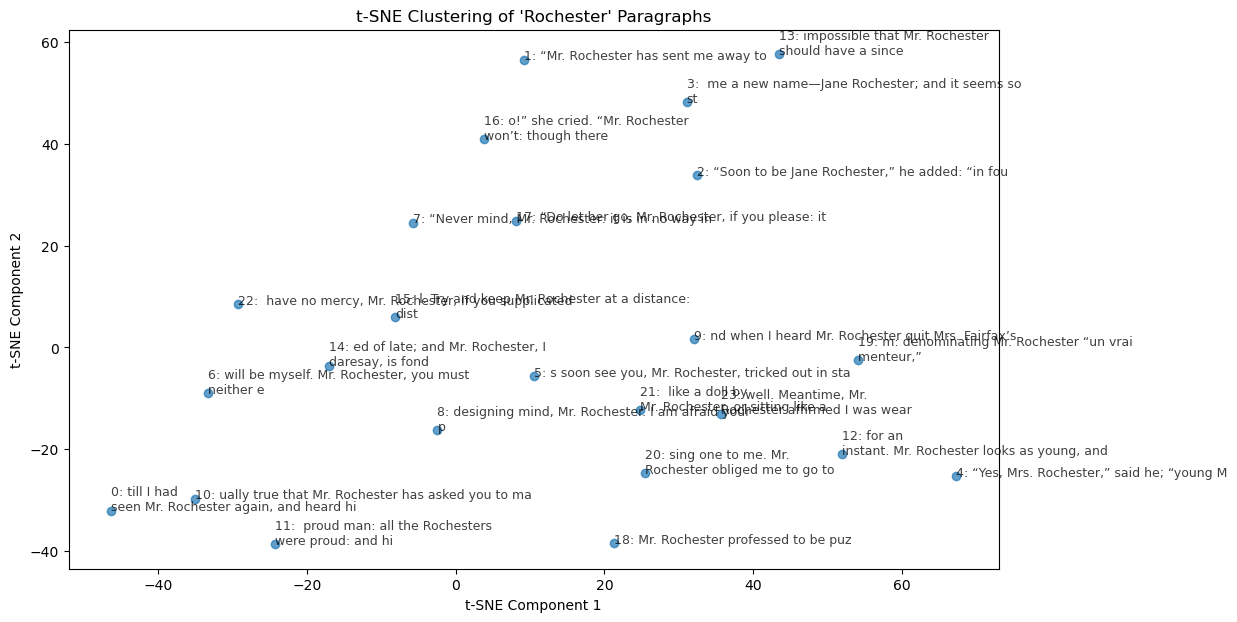

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

# Reduce vector dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Function to extract 20 characters before & after "Rochester"
def get_context(text, keyword="Rochester", window=20):
    match = re.search(keyword, text)
    if match:
        start = max(0, match.start() - window)
        end = min(len(text), match.end() + window)
        return text[start:end]
    return text[:40]  # Default to first 40 chars if no match

# Generate annotations
annotations = [f"{i}: {get_context(span.text)}" for i, span in enumerate(rochester_paras)]

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with index + text snippet
for i, (x, y) in enumerate(reduced_vectors):
    plt.annotate(annotations[i], (x, y), fontsize=9, alpha=0.75)

plt.title("t-SNE Clustering of 'Rochester' Paragraphs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

We can alter the perplexity and early exaggeration of this clustering process. Early exaggeration will increase the separation during the early part of the t-SNE operation, which will help spread out the points. Perplexity controls how many of a vector's neighbors are considered at any point in the process. Lower perplexity means the algorithm only consideres a few neighbors of any given vector, whereas higher perplexity means it consisders more neighbors at once. Generally speaking a low perplexity is better for smaller datasets, which we have here, and may generate more clusters, while a higher perplexity will focus more on global structure than on local structure. In this method of clustering, it is important to test different values for perplexity and exaggeration.

Here, I try relatively high perplexity and early exaggeration. Perplexity as high as 50 may be used in some analyses, but it cannot be more than the number of vectors in the dataset, which in this case is 24. So for this situation, 20 is high perplexity. This approach spreads out the values in the chart.

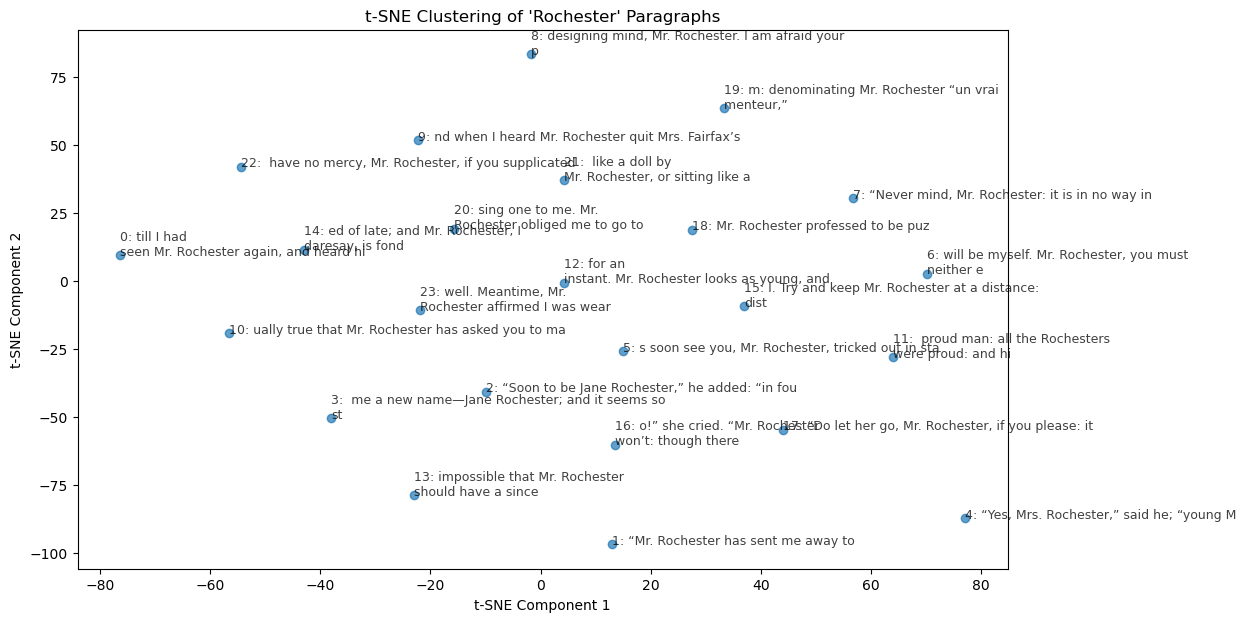

In [27]:
# Reduce vector dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=20, early_exaggeration=12, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with index + text snippet
for i, (x, y) in enumerate(reduced_vectors):
    plt.annotate(annotations[i], (x, y), fontsize=9, alpha=0.75)

plt.title("t-SNE Clustering of 'Rochester' Paragraphs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Now we'll see what happens when we use low perplexity and low early exaggeration.

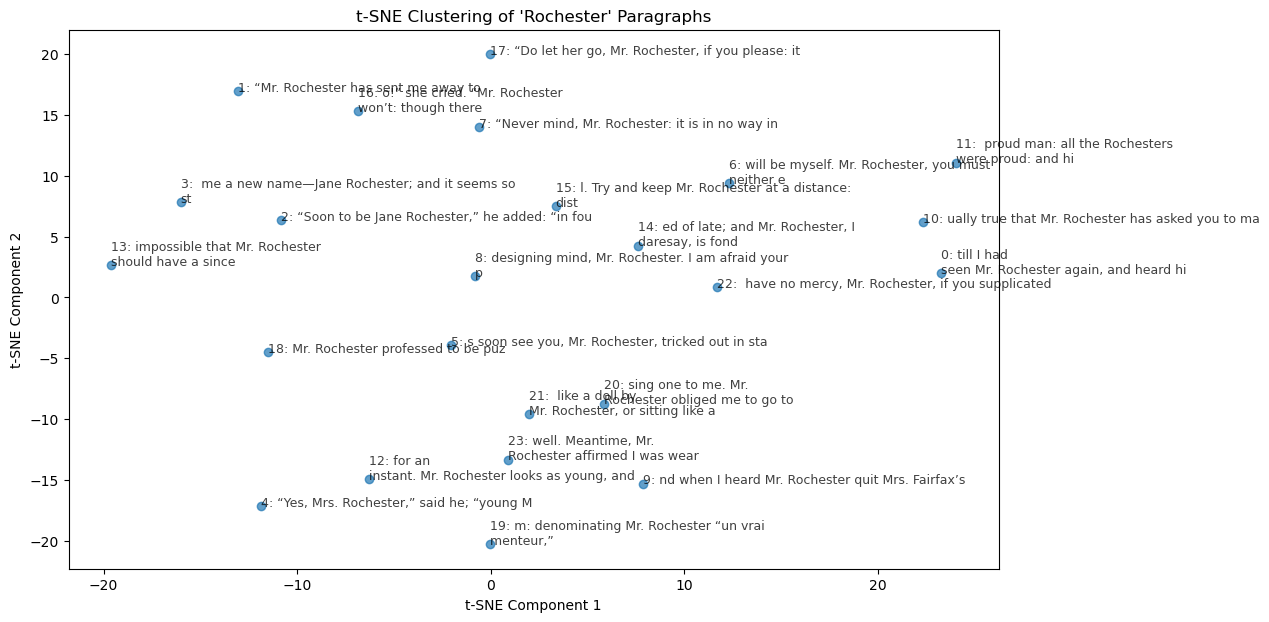

In [28]:
# Reduce vector dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=4, early_exaggeration=2, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with index + text snippet
for i, (x, y) in enumerate(reduced_vectors):
    plt.annotate(annotations[i], (x, y), fontsize=9, alpha=0.75)

plt.title("t-SNE Clustering of 'Rochester' Paragraphs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Finally, we try low perplexity and high early exaggeration. This approach results in the most clustering. This suggests what patterns we might look at in pursuing a further analysis of how Rochester is portrayed in *Jane Eyre*.

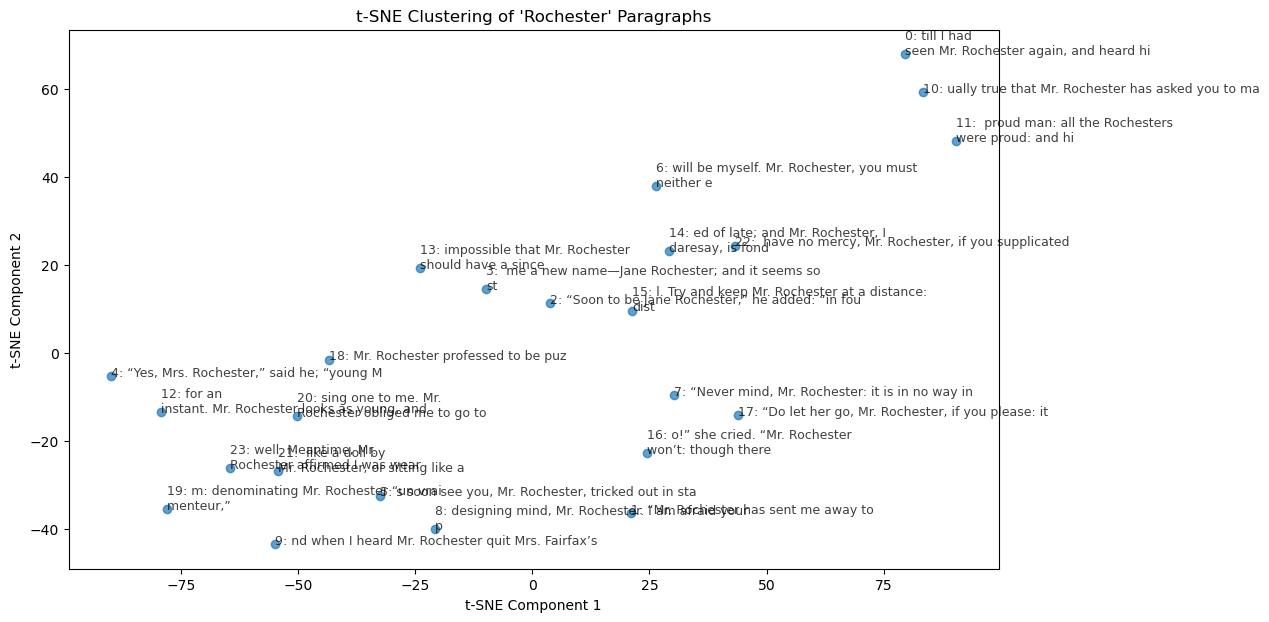

In [29]:
# Reduce vector dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=2, early_exaggeration=12, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot the clusters
plt.figure(figsize=(12, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with index + text snippet
for i, (x, y) in enumerate(reduced_vectors):
    plt.annotate(annotations[i], (x, y), fontsize=9, alpha=0.75)

plt.title("t-SNE Clustering of 'Rochester' Paragraphs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

If we want to see the text of one of these paragraphs, remember that they are Span objects, so we need to look at the object's `text` property.

In [30]:
print(rochester_paras[4].text)

“Yes, Mrs. Rochester,” said he; “young Mrs. Rochester—Fairfax
Rochester’s girl-bride.”


## Sentiment Analysis

### Sentiment analysis with NLTK and VADER

There are a variety of tools capable of doing sentiment analysis, that is, determining whether a particular text is expressing positive or negative emotions, and what the intensity of those emotions is.

We will first take a look at VADER. VADER means "Valence Aware Dictionary and sEntiment Reasoner". It is available through the NLTK (Natural Language Tool Kit) Python library. It has been trained on short-form web, social media, and messaging content, and is particularly good at interpreting short texts that include slang and emojis. It is not an obvious choice for the sort of literary text we are looking at, but its usage is straightforward and it is very useful for data obtained from the web or from apps via scraping or APIs.

To use VADER, we should first import NLTK and download the VADER module. We only need to download VADER once. Then we can load the VADER sentiment intensity analyzer. Note that NLTK must be installed to your environment first.

In [31]:
import nltk

One time only:

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jof610/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

We are going to run the sentiment analyzer on raw text, not on tokenized text. To analyze the Rochester paragraphs, we must extract them in text form. Going back to our text paragraphs from chapter 24, we can extract the paragraphs that refer to Rochester as follows:

In [34]:
rochester_text_paras = [para for para in paragraphs if "Rochester" in para]

In [35]:
len(rochester_text_paras)

24

Now we create an instance of our sentiment analyzer.

In [36]:
sid = SentimentIntensityAnalyzer()

In [37]:
sid.polarity_scores(rochester_text_paras[0])

{'neg': 0.041, 'neu': 0.767, 'pos': 0.192, 'compound': 0.7708}

The component scores (neg, neu, pos) indicate the proportion of text falling in each of these categories. The compound score is an overall measure of positivity or negativity. A positive score is positive. The closer to 1, the more positive. Negative compound scores are negative. Scores around zero are neutral. 

As we can see, the first paragraph mentioning Rochester ("As I rose and dressed, I thought over what had happened, and wondered if it were a dream. I could not be certain of the reality till I had seen Mr. Rochester again, and heard him renew his words of love and promise") is judged to be positive, at a compound score of .77.

We can examine the polarity scores like this:

In [38]:
for para in rochester_text_paras:
    print(para)
    print('--------------')
    print(sid.polarity_scores(para))
    print("")

As I rose and dressed, I thought over what had happened, and wondered
if it were a dream. I could not be certain of the reality till I had
seen Mr. Rochester again, and heard him renew his words of love and
promise.
--------------
{'neg': 0.041, 'neu': 0.767, 'pos': 0.192, 'compound': 0.7708}

“Mr. Rochester has sent me away to the nursery.”
--------------
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

“Soon to be Jane Rochester,” he added: “in four weeks, Janet; not a day
more. Do you hear that?”
--------------
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

“Because you gave me a new name—Jane Rochester; and it seems so
strange.”
--------------
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

“Yes, Mrs. Rochester,” said he; “young Mrs. Rochester—Fairfax
Rochester’s girl-bride.”
--------------
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

“And then you won’t know me, sir; and I shall not be your Jane Eyre any
longer, but an ape in a harlequin’s jacket—a j

On close inspection, in my opinion, this is not providing a very accurate measure of sentiment in Jane Eyre. It seems to be missing out on the subtleties of Brontë's style. Unsurprisingly, it has a very hard time with irony and sarcasm.

Nevertheless, we could generate a visualization as follows.

In [39]:
scores = [sid.polarity_scores(para) for para in rochester_text_paras]

In [40]:
scores

[{'neg': 0.041, 'neu': 0.767, 'pos': 0.192, 'compound': 0.7708},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.024, 'neu': 0.705, 'pos': 0.272, 'compound': 0.9669},
 {'neg': 0.066, 'neu': 0.883, 'pos': 0.051, 'compound': -0.2263},
 {'neg': 0.155, 'neu': 0.662, 'pos': 0.182, 'compound': 0.3204},
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182},
 {'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'compound': 0.2382},
 {'neg': 0.038, 'neu': 0.9, 'pos': 0.062, 'compound': 0.4956},
 {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.8625},
 {'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.5986},
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.7677},
 {'neg': 0.128, 'neu': 0.76, 'pos': 0.112, 'compound': -0.5142},
 {'neg': 0.088, 'neu': 0.808, 'pos': 0.104, 'compound': 0.1916},
 {'ne

In [41]:
compound_scores = [entry['compound'] for entry in scores]

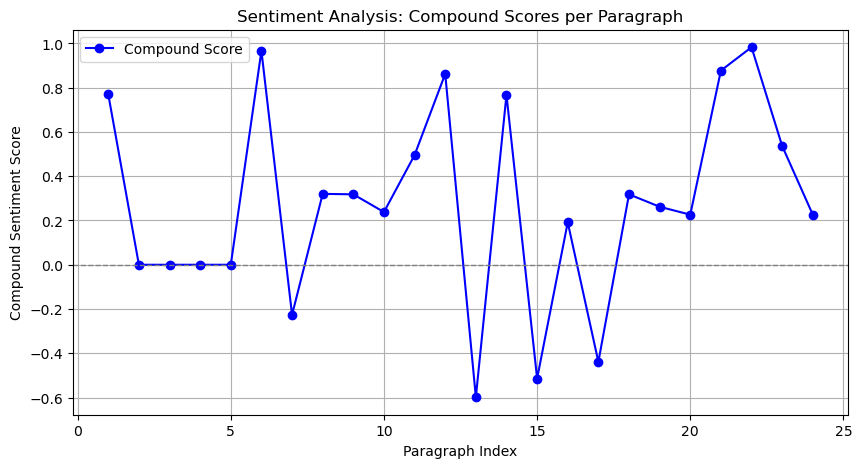

In [42]:
# X-axis: paragraph indices
x_values = list(range(1, len(compound_scores) + 1))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x_values, compound_scores, marker='o', linestyle='-', color='b', label="Compound Score")

# Formatting
plt.xlabel("Paragraph Index")
plt.ylabel("Compound Sentiment Score")
plt.title("Sentiment Analysis: Compound Scores per Paragraph")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Zero sentiment reference line
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## TextBlob

Let's try a different sentiment analyzer from an NLP library called `TextBlob`, which has a reputation for good context awareness and ability to interpret metaphor. If using Anaconda Navigator, be sure to return to your environments tab to install the textblob package. Otherwise, install the textblob package to your Python environment using your preferred virtual environment management technique.

In [43]:
from textblob import TextBlob

Now, we can turn our raw text paragraphs into TextBlob objects. Each blob has an associated sentiment analysis. We can look at its polarity ratings (from -1 to 1). It also has a subjectivity rating, which assesses how objective or subjective a statement is. In addition, we can look at assessments of specific words. For any given text, we can see the specific words TextBlob focused on, with polarity and subjectivity ratings for that word. The third parameter is a placeholder for a confidence rating that was never implemented, so it is always set to "None".

In [44]:
for para in rochester_text_paras:
    blob = TextBlob(para)
    print(para)
    print(f"Polarity: {blob.polarity}")
    print(f"Subjectivity: {blob.subjectivity}")
    print(blob.sentiment_assessments)
    print('-----------------------')

As I rose and dressed, I thought over what had happened, and wondered
if it were a dream. I could not be certain of the reality till I had
seen Mr. Rochester again, and heard him renew his words of love and
promise.
Polarity: 0.4380952380952381
Subjectivity: 0.7071428571428572
Sentiment(polarity=0.4380952380952381, subjectivity=0.7071428571428572, assessments=[(['rose'], 0.6, 0.95, None), (['certain'], 0.21428571428571427, 0.5714285714285714, None), (['love'], 0.5, 0.6, None)])
-----------------------
“Mr. Rochester has sent me away to the nursery.”
Polarity: 0.0
Subjectivity: 0.0
Sentiment(polarity=0.0, subjectivity=0.0, assessments=[])
-----------------------
“Soon to be Jane Rochester,” he added: “in four weeks, Janet; not a day
more. Do you hear that?”
Polarity: 0.5
Subjectivity: 0.5
Sentiment(polarity=0.5, subjectivity=0.5, assessments=[(['more'], 0.5, 0.5, None)])
-----------------------
“Because you gave me a new name—Jane Rochester; and it seems so
strange.”
Polarity: 0.0431818

We can generate a list of the polarities and plot them on a graph, as we did with our Vader compound scores.

In [45]:
polarities = [TextBlob(para).polarity for para in rochester_text_paras]

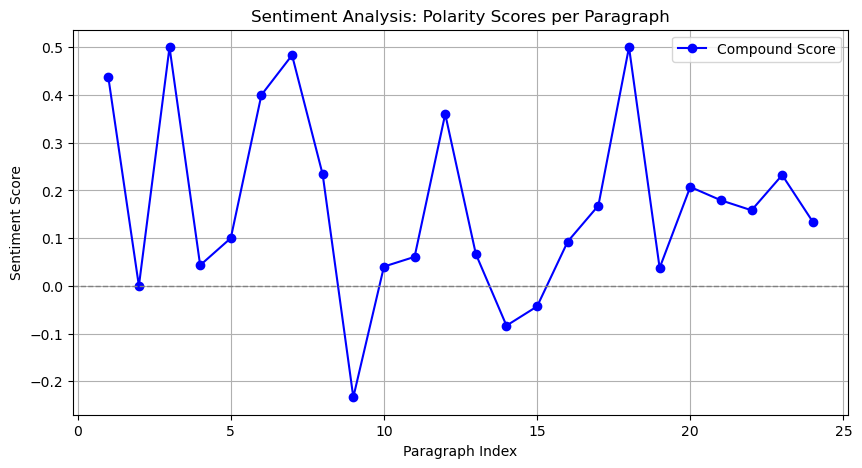

In [46]:
# X-axis: paragraph indices
x_values = list(range(1, len(polarities) + 1))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x_values, polarities, marker='o', linestyle='-', color='b', label="Compound Score")

# Formatting
plt.xlabel("Paragraph Index")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis: Polarity Scores per Paragraph")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Zero sentiment reference line
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

We can compare the results for the two ratings by plotting them on the same graph in different colors.

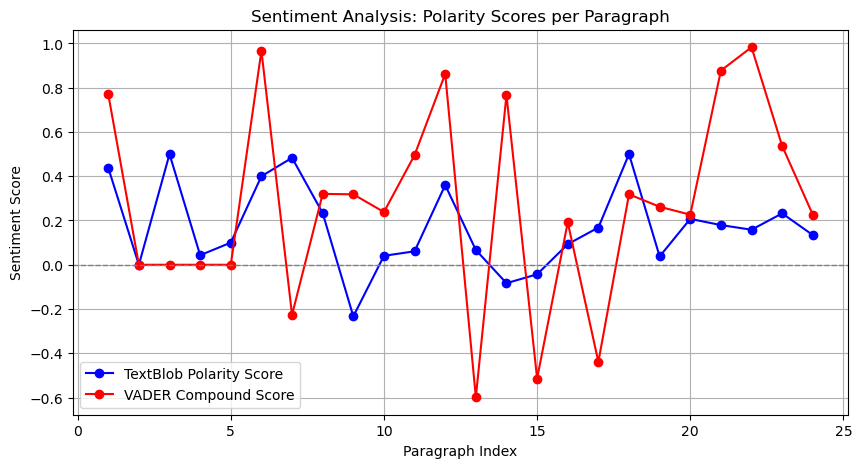

In [47]:
# X-axis: paragraph indices
x_values = list(range(1, len(polarities) + 1))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x_values, polarities, marker='o', linestyle='-', color='b', label="TextBlob Polarity Score")
plt.plot(x_values, compound_scores, marker='o', linestyle='-', color='r', label="VADER Compound Score")

# Formatting
plt.xlabel("Paragraph Index")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis: Polarity Scores per Paragraph")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Zero sentiment reference line
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

There are hundreds of sentiment analysis packages specialized for various languages and uses. It is worth exploring the available engines and selecting one appropriate to your purpose. One way to test multiple sentiment analysis models is the **Transfomers** Python library. 

Install the `transformers` package through your Anaconda Navigator environments menu, or use your favo
red packaged management system. With this package installed, we can import the transfomers pipeline and bring in the sentiment analysis component. You will also need to install `tf-keras` and *either* `tensorflow` *or* `pytorch`.

In [51]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Now, we can run a sentiment analysis with just one line:

In [60]:
base_scores = sentiment_pipeline(rochester_text_paras)
base_scores

[{'label': 'POSITIVE', 'score': 0.9984880685806274},
 {'label': 'POSITIVE', 'score': 0.8900303244590759},
 {'label': 'POSITIVE', 'score': 0.9027460813522339},
 {'label': 'NEGATIVE', 'score': 0.9923283457756042},
 {'label': 'POSITIVE', 'score': 0.9968158602714539},
 {'label': 'NEGATIVE', 'score': 0.9816651940345764},
 {'label': 'NEGATIVE', 'score': 0.9844675660133362},
 {'label': 'NEGATIVE', 'score': 0.9820864200592041},
 {'label': 'POSITIVE', 'score': 0.9534243941307068},
 {'label': 'NEGATIVE', 'score': 0.9976491332054138},
 {'label': 'NEGATIVE', 'score': 0.8237947225570679},
 {'label': 'POSITIVE', 'score': 0.9987322688102722},
 {'label': 'NEGATIVE', 'score': 0.9839258193969727},
 {'label': 'NEGATIVE', 'score': 0.9979167580604553},
 {'label': 'POSITIVE', 'score': 0.9684094786643982},
 {'label': 'NEGATIVE', 'score': 0.8719261288642883},
 {'label': 'NEGATIVE', 'score': 0.98787921667099},
 {'label': 'NEGATIVE', 'score': 0.9913130402565002},
 {'label': 'NEGATIVE', 'score': 0.99300187826156

This uses the default [distilBERT](https://arxiv.org/abs/1910.01108) sentiment analysis model. The scores are confidence levels, with scores about .95 indicating high confidence and sentiment intensity, while scores from 80-95 suggest mixed sentiment and possible subtle language. Scores below 80 would indicate low confidence of classification.

There are [hundreds of models](https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment) available in the transformers pipeline. You can easily substitute other models as follows:

In [62]:
test_model = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [63]:
cardiff_nlp_scores = test_model(rochester_text_paras)
cardiff_nlp_scores

[{'label': 'neutral', 'score': 0.8051486015319824},
 {'label': 'neutral', 'score': 0.8740386962890625},
 {'label': 'neutral', 'score': 0.8603267073631287},
 {'label': 'neutral', 'score': 0.49672555923461914},
 {'label': 'neutral', 'score': 0.7896531224250793},
 {'label': 'neutral', 'score': 0.5264625549316406},
 {'label': 'neutral', 'score': 0.5987873673439026},
 {'label': 'negative', 'score': 0.7806500196456909},
 {'label': 'neutral', 'score': 0.6246861815452576},
 {'label': 'neutral', 'score': 0.832292377948761},
 {'label': 'neutral', 'score': 0.616292417049408},
 {'label': 'positive', 'score': 0.6288683414459229},
 {'label': 'neutral', 'score': 0.4887545704841614},
 {'label': 'neutral', 'score': 0.5007398724555969},
 {'label': 'positive', 'score': 0.7292898893356323},
 {'label': 'neutral', 'score': 0.6514511108398438},
 {'label': 'neutral', 'score': 0.4507373571395874},
 {'label': 'neutral', 'score': 0.5374808311462402},
 {'label': 'neutral', 'score': 0.8266561031341553},
 {'label':

It can be challenging to compare scores from different models, since their scoring systems can often be different. In this case, scores above 80 are high confidence, scores about 50 are medium, and below fifty is low confidence. Furthermore, the cardiff model has neutral scores, which dont' exist in the distilbert model. Here is one possible approach to the visualization.

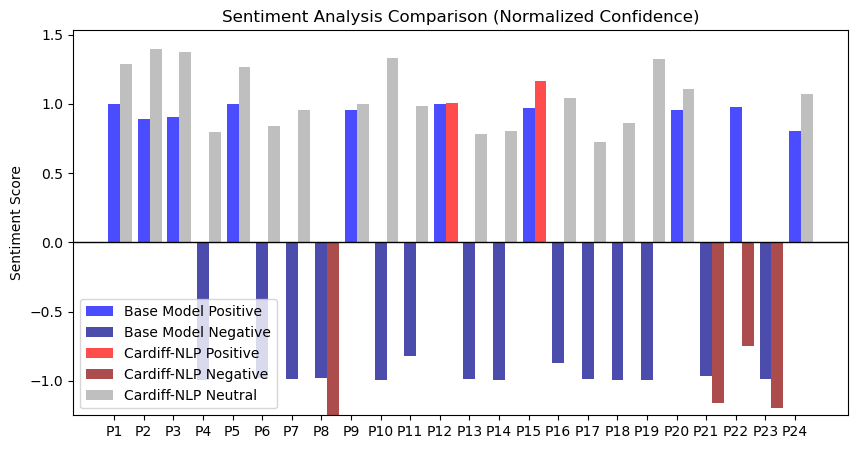

In [66]:
# Normalize Cardiff-NLP confidence (mapping 50 to 80 in Base Model)
def normalize_confidence(cardiff_score):
    return (cardiff_score - 0.50) * (0.80 / 0.50) + 0.80

normalized_cardiff = [{'label': entry['label'], 'score': normalize_confidence(entry['score'])} for entry in cardiff_nlp_scores]

# Convert labels to numerical values
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
base_positive = [entry['score'] if entry['label'].lower() == 'positive' else 0 for entry in base_scores]
base_negative = [-entry['score'] if entry['label'].lower() == 'negative' else 0 for entry in base_scores]

cardiff_positive = [entry['score'] if entry['label'].lower() == 'positive' else 0 for entry in normalized_cardiff]
cardiff_negative = [-entry['score'] if entry['label'].lower() == 'negative' else 0 for entry in normalized_cardiff]
cardiff_neutral = [entry['score'] if entry['label'].lower() == 'neutral' else 0 for entry in normalized_cardiff]

# X-axis labels (paragraph indices)
x = np.arange(len(base_scores))

# Plot stacked bars
plt.figure(figsize=(10, 5))

# Base model bars
plt.bar(x, base_positive, width=0.4, label='Base Model Positive', color='blue', alpha=0.7)
plt.bar(x, base_negative, width=0.4, label='Base Model Negative', color='darkblue', alpha=0.7)

# Cardiff-NLP bars
plt.bar(x + 0.4, cardiff_positive, width=0.4, label='Cardiff-NLP Positive', color='red', alpha=0.7)
plt.bar(x + 0.4, cardiff_negative, width=0.4, label='Cardiff-NLP Negative', color='darkred', alpha=0.7)
plt.bar(x + 0.4, cardiff_neutral, width=0.4, label='Cardiff-NLP Neutral', color='gray', alpha=0.5, bottom=cardiff_negative)

plt.axhline(0, color='black', linewidth=1)  # Neutral line
plt.xticks(x, [f'P{i+1}' for i in range(len(base_scores))])  # Labels for paragraphs
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Comparison (Normalized Confidence)')
plt.legend()
plt.show()

With sentiment analysis, it is important to explore various alternative models and evaluate how closely they fit your expectations. Here is a list of [models supported in the Hugging Face transformers model](https://huggingface.co/docs/transformers/v4.17.0/en/index).